In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv("/content/drive/My Drive/XAI/XAI_Fairness/combinedataF1.csv")
df = df.drop(columns=['Unnamed: 0'])

In [4]:
# Calculate class distribution
class_distribution = df['is_recid'].value_counts(normalize=True)
print("Class Distribution (%):\n", class_distribution)


Class Distribution (%):
 is_recid
0    0.518852
1    0.481148
Name: proportion, dtype: float64


In [5]:
df.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,Female-African-American,Female-Asian,Female-Caucasian,Female-Hispanic,Female-Native-American,Female-Other,Male-African-American,Male-Asian,Male-Caucasian,Male-Hispanic,Male-Native-American,Male-Other
0,69,1,0,0.0,1.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True
1,34,3,0,10.0,1.0,1,1,False,False,False,False,False,False,True,False,False,False,False,False
2,24,4,4,1.0,1.0,0,1,False,False,False,False,False,False,True,False,False,False,False,False
3,23,8,1,0.0,1.0,0,0,False,False,False,False,False,False,True,False,False,False,False,False
4,43,1,2,0.0,76.0,0,0,False,False,False,False,False,False,False,False,False,False,False,True


In [6]:
filtered_df=df

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
filtered_df['Female-African-American'] = label_encoder.fit_transform(filtered_df['Female-African-American'])
filtered_df['Male-African-American'] = label_encoder.fit_transform(filtered_df['Male-African-American'])
filtered_df['Female-Caucasian'] = label_encoder.fit_transform(filtered_df['Female-Caucasian'])
filtered_df['Female-Asian'] = label_encoder.fit_transform(filtered_df['Female-Asian'])
filtered_df['Female-Native-American'] = label_encoder.fit_transform(filtered_df['Female-Native-American'])
filtered_df['Female-Other'] = label_encoder.fit_transform(filtered_df['Female-Other'])


filtered_df['Male-Caucasian'] = label_encoder.fit_transform(filtered_df['Male-Caucasian'])
filtered_df['Female-Hispanic'] = label_encoder.fit_transform(filtered_df['Female-Hispanic'])
filtered_df['Male-Hispanic'] = label_encoder.fit_transform(filtered_df['Male-Hispanic'])
filtered_df['Male-Asian'] = label_encoder.fit_transform(filtered_df['Male-Asian'])
filtered_df['Male-Native-American'] = label_encoder.fit_transform(filtered_df['Male-Native-American'])
filtered_df['Male-Other'] = label_encoder.fit_transform(filtered_df['Male-Other'])


In [8]:
# Correct way to drop the target column
X = df.drop(columns=['is_recid'])
Y = df['is_recid']


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train and temporary (test + validation)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.50, random_state=42)

print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Test set shape:", X_test.shape, Y_test.shape)


Training set shape: (5771, 18) (5771,)
Validation set shape: (721, 18) (721,)
Test set shape: (722, 18) (722,)


# Simple DL

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))  # Corrected line: Add Dropout layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history=model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - acc: 0.5545 - loss: 3.2935 - val_acc: 0.6782 - val_loss: 0.7930
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6570 - loss: 1.0124 - val_acc: 0.6782 - val_loss: 0.5915
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.6651 - loss: 0.6321 - val_acc: 0.6963 - val_loss: 0.5800
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6750 - loss: 0.6162 - val_acc: 0.7018 - val_loss: 0.5754
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6771 - loss: 0.6179 - val_acc: 0.7101 - val_loss: 0.5649
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6823 - loss: 0.5925 - val_acc: 0.7074 - val_loss: 0.5722
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6976 - loss: 0.5864 - val_acc: 0.7074 - val_loss: 0.5640
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7016 - loss: 0.5810 - val_acc: 0.7517 - val_loss: 0.5336
Epoch 9/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

In [12]:
from sklearn.metrics import accuracy_score

train_predictions = (model.predict(X_train) > 0.5).astype("int32")
test_predictions = (model.predict(X_test) > 0.5).astype("int32")

train_score = accuracy_score(Y_train, train_predictions) * 100
test_score = accuracy_score(Y_test, test_predictions) * 100

print(f"Train accuracy: {train_score:.2f}%")
print(f"Test accuracy: {test_score:.2f}%")


181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train accuracy: 71.72%
Test accuracy: 71.47%


In [13]:
from sklearn.metrics import accuracy_score ,auc
from sklearn.metrics import roc_curve, auc

def calculateAUC(model, X_test, Y_test):
    y_proba = model.predict(X_test)
    # If Y_test is one-hot encoded, take the column corresponding to the positive class
    if y_proba.shape[1] > 1:
        y_proba = y_proba[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_test, y_proba)  # Calculate FPR and TPR
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    print(f"AUC: {roc_auc:.4f}")  # Print the AUC value

    return roc_auc

calculateAUC(model,X_test, Y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
AUC: 0.7649


0.7649183671892505

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


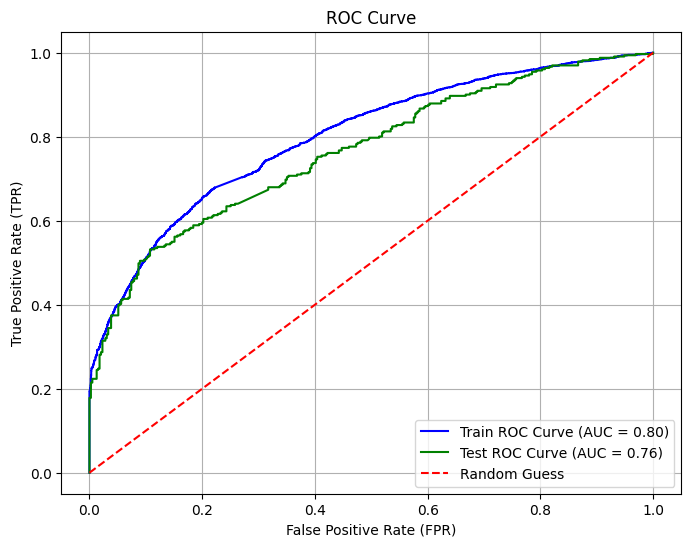

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_pred_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_pred_test_prob)

auc_train = roc_auc_score(Y_train, y_pred_train_prob)
auc_test = roc_auc_score(Y_test, y_pred_test_prob)

# Plot ROC curves for both train and test
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Train ROC Curve (AUC = {auc_train:.2f})")
plt.plot(fpr_test, tpr_test, color='green', label=f"Test ROC Curve (AUC = {auc_test:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


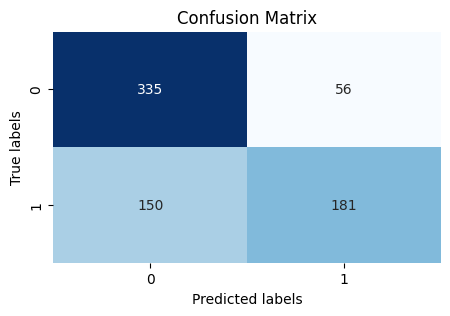

In [15]:
conf_matrix1 = confusion_matrix(Y_test, test_predictions)

plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### Shap

In [16]:
import shap

shap.initjs()

In [17]:
# Convert DataFrames to numpy arrays
X_train_scaled_np = X_train.to_numpy().astype(np.float32)
X_test_scaled_np = X_test.to_numpy().astype(np.float32)


explainer = shap.DeepExplainer(model, X_train_scaled_np)

shap_values = explainer.shap_values(X_test_scaled_np)

# Check the type and shape of SHAP values
print("SHAP values type:", type(shap_values))  # Should be a list or tuple
print("Number of SHAP value arrays:", len(shap_values))  # For binary classification, it should be 2
print("Shape of SHAP values array:", np.array(shap_values).shape)  # Check the shape


SHAP values type: <class 'numpy.ndarray'>
Number of SHAP value arrays: 722
Shape of SHAP values array: (722, 18, 1)


## For first index

In [18]:
X_test.loc[1662]

,1662
age,19.0
decile_score,6.0
priors_count,0.0
days_in_jail,2.0
c_days_from_compas,1.0
is_violent_recid,1.0
Female-African-American,0.0
Female-Asian,0.0
Female-Caucasian,0.0
Female-Hispanic,0.0


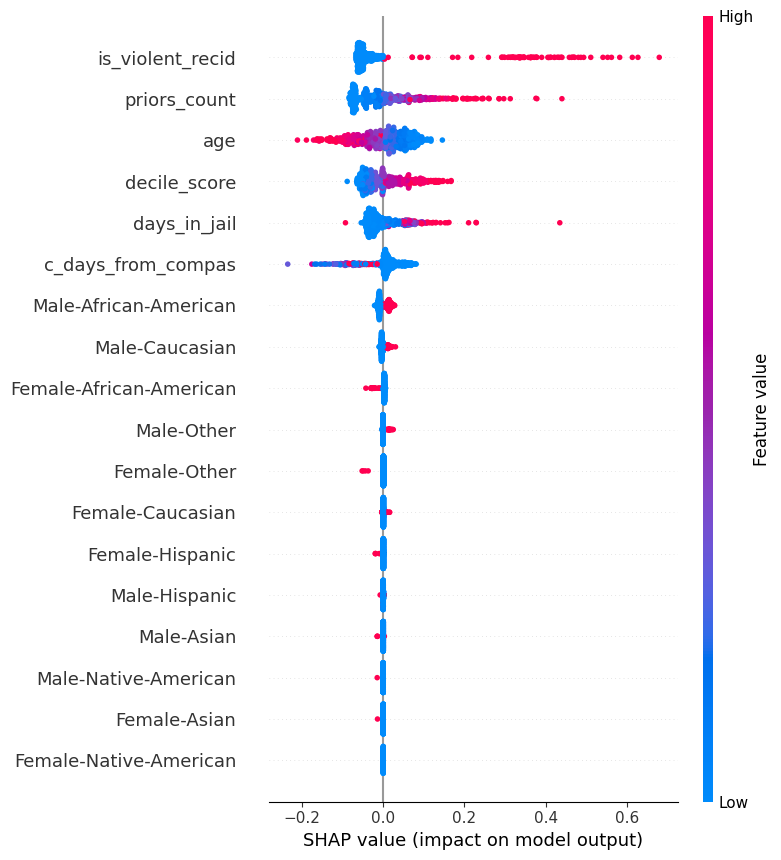

In [19]:
feature_names = ['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female-African-American',
       'Female-Asian', 'Female-Caucasian', 'Female-Hispanic',
       'Female-Native-American', 'Female-Other', 'Male-African-American',
       'Male-Asian', 'Male-Caucasian', 'Male-Hispanic', 'Male-Native-American',
       'Male-Other']
shap.summary_plot(shap_values[:, :, 0], X_test_scaled_np, feature_names=feature_names)


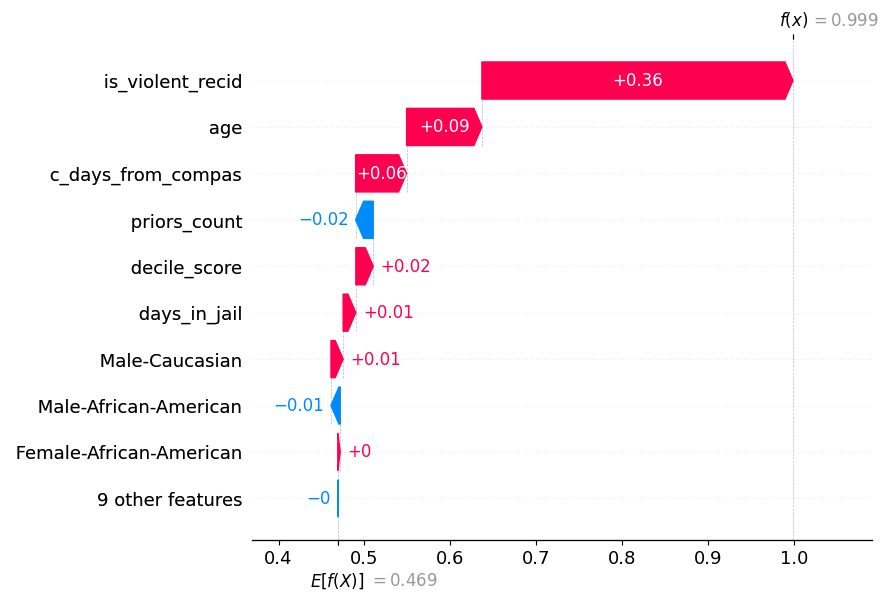

In [20]:
# Select a single instance (the first row of x_test)
sample_index = 0

shap_values_instance = shap_values[sample_index, :, 0]
expected_value = explainer.expected_value[0].numpy()
features_instance = X_test_scaled_np[sample_index]
feature_names = ['age', 'decile_score', 'priors_count', 'days_in_jail',
       'c_days_from_compas', 'is_violent_recid', 'Female-African-American',
       'Female-Asian', 'Female-Caucasian', 'Female-Hispanic',
       'Female-Native-American', 'Female-Other', 'Male-African-American',
       'Male-Asian', 'Male-Caucasian', 'Male-Hispanic', 'Male-Native-American',
       'Male-Other']
shap.plots._waterfall.waterfall_legacy(
    expected_value=expected_value,
    shap_values=shap_values_instance,
    features=features_instance,
    feature_names=feature_names
)


In [21]:
import pandas as pd

shap_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': shap_values_instance,
    'Feature Value': features_instance
})

shap_scores_df = shap_scores_df.sort_values(by='SHAP Value', ascending=False)

# Display the sorted table
print(shap_scores_df)


                    Feature  SHAP Value  Feature Value
5          is_violent_recid    0.362096            1.0
0                       age    0.087631           19.0
4        c_days_from_compas    0.059318            1.0
1              decile_score    0.020250            6.0
3              days_in_jail    0.014786            2.0
14           Male-Caucasian    0.014151            1.0
6   Female-African-American    0.002811            0.0
11             Female-Other    0.000556            0.0
9           Female-Hispanic    0.000287            0.0
15            Male-Hispanic    0.000163            0.0
16     Male-Native-American    0.000022            0.0
7              Female-Asian    0.000004            0.0
13               Male-Asian   -0.000009            0.0
10   Female-Native-American   -0.000020            0.0
8          Female-Caucasian   -0.000432            0.0
17               Male-Other   -0.001074            0.0
12    Male-African-American   -0.010754            0.0
2         

In [22]:
import pandas as pd

# Extract SHAP values for class 0
shap_values_class_0 = shap_values[:, :, 0]  # For the first class=0

# Convert SHAP values for class 0 to a pandas DataFrame
shap_table = pd.DataFrame(
    shap_values_class_0,
    columns=X_test.columns,  # Use feature names from X_test
    index=X_test.index       # Use the index from X_test
)

# Convert base value to a Python float
base_value = float(explainer.expected_value[0])  # Adjust index if needed for multi-class

# Add the base value column
shap_table['Base Value'] = base_value

# Compute the SHAP prediction (optional)
shap_table['SHAP Prediction'] = shap_table.sum(axis=1) + base_value




In [23]:
shap_table.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,Female-African-American,Female-Asian,Female-Caucasian,Female-Hispanic,Female-Native-American,Female-Other,Male-African-American,Male-Asian,Male-Caucasian,Male-Hispanic,Male-Native-American,Male-Other,Base Value,SHAP Prediction
1662,0.087631,0.020250,-0.020512,0.014786,0.059318,0.362096,0.002811,3.711490e-06,-0.000432,0.000287,-2.013858e-05,0.000556,-0.010754,-0.000009,0.014151,0.000163,2.205736e-05,-0.001074,0.469438,1.468149
6811,0.076682,0.061741,-0.032673,0.069828,0.033241,-0.049962,0.002876,2.408895e-06,-0.000630,0.000225,-3.252776e-05,0.000540,-0.010752,0.000018,0.017280,-0.000013,1.809197e-05,-0.000779,0.469438,1.106488
549,-0.005797,-0.004529,-0.001313,-0.004239,-0.026256,-0.001425,0.000076,1.642016e-07,-0.000026,0.000307,-1.162477e-07,0.000026,-0.000324,0.000002,0.000124,0.000010,-5.088033e-07,0.000016,0.469438,0.895527
1373,-0.080799,-0.050028,-0.038459,0.038246,-0.058359,-0.039223,0.002097,2.731731e-06,0.000131,0.000168,-1.245744e-05,0.000424,-0.007486,0.000063,-0.002498,0.000231,1.234620e-05,-0.000328,0.469438,0.703060
6060,0.056802,-0.035035,-0.041915,-0.031581,0.008249,-0.063396,0.002936,2.994489e-06,0.000375,0.000289,-2.365712e-05,0.000564,0.015102,0.000064,-0.004327,-0.000026,2.332528e-05,-0.000810,0.469438,0.846169




---



---



---



### Lime

In [ ]:
! pip install lime

In [25]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np


XAI for only instance from xtest


---



In [26]:
# Define a prediction function that returns probabilities for both classes
def predict_fn(X):
    X = np.array(X)
    # Get the probability for class 1
    prob_class_1 = model.predict(X)
    # Probability for class 0 is the complement of class 1
    prob_class_0 = 1 - prob_class_1
    # Return both probabilities (class 0 and class 1)
    return np.hstack((prob_class_0, prob_class_1))

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=[0, 1],
    mode='classification'
)

# Select a sample to explain (e.g., the first instance in the test set)
sample_index = 0
sample = X_test.iloc[sample_index].values

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    data_row=sample,                # The instance to explain
    predict_fn=predict_fn           # The updated prediction function
)

explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [27]:
lime_values = explanation.as_list()
lime_table = pd.DataFrame(lime_values, columns=['Feature', 'Contribution'])
# Display the sorted table
print(lime_table)

                           Feature  Contribution
0          is_violent_recid > 0.00      0.401172
1             Female-Asian <= 0.00      0.104460
2             priors_count <= 0.00     -0.091508
3       c_days_from_compas <= 1.00      0.075790
4                     age <= 25.00      0.074409
5               Male-Asian <= 0.00      0.057033
6             Female-Other <= 0.00      0.047458
7   Female-Native-American <= 0.00     -0.041056
8      4.00 < decile_score <= 7.00      0.026998
9  Female-African-American <= 0.00      0.017159




---



---



---



### 3.Permutation Feature Importance





In [28]:
from sklearn.inspection import permutation_importance


XAI for all Xtest data

In [29]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Define a custom scoring function
def keras_scoring_function(model, X, y):
    y_pred = model.predict(X)
    # Convert probabilities to class labels (0 or 1) by applying a threshold of 0.5
    y_pred_class = (y_pred > 0.5).astype(int)
    # Return the accuracy score
    return accuracy_score(y, y_pred_class)

# Use permutation importance with the custom scoring function
result = permutation_importance(
    model, X_test, Y_test,
    n_repeats=10, random_state=42,
    scoring=keras_scoring_function
)

# Create a DataFrame to display the results with feature names
importance_df = pd.DataFrame({
    'Feature': X_test.columns,  # Feature names
    'Importance': result.importances_mean  # Mean permutation importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the table
print(importance_df)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━



---



---



---



### 4. Accumulated Local Effects (ALE)

---



In [ ]:
! pip install alibi

XAI for all xtest data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2

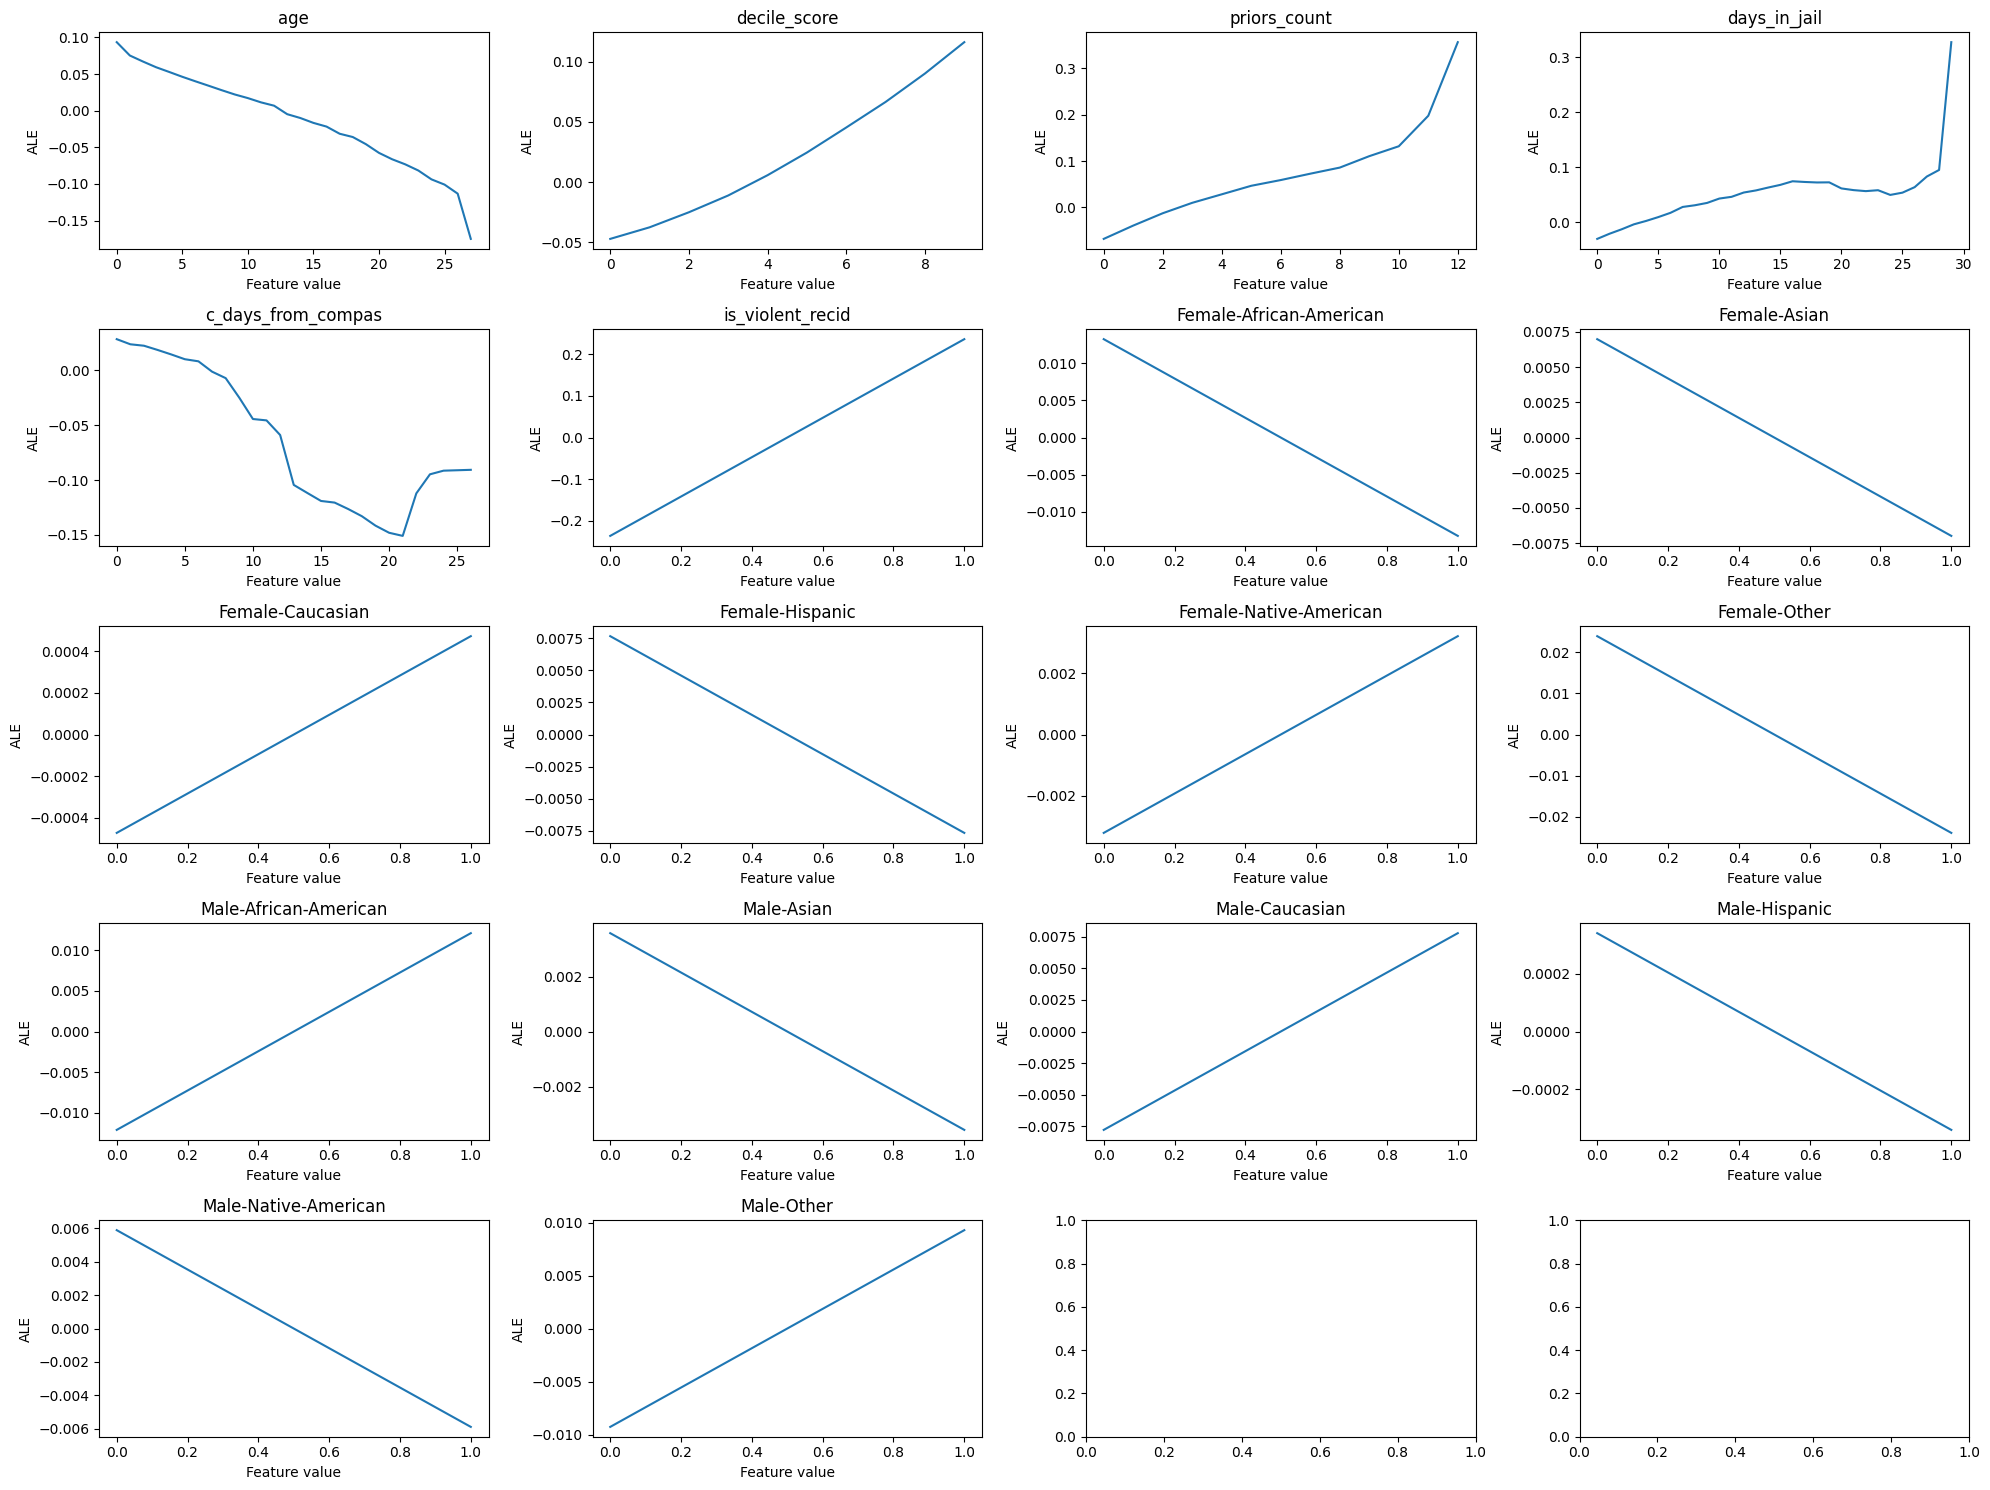

In [30]:
from alibi.explainers import ALE
import matplotlib.pyplot as plt
X_test = X_test.astype(np.float32)

ale = ALE(model.predict, feature_names=X.columns.tolist())

ale_exp = ale.explain(X_test.values)

fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
for i, axi in enumerate(ax.flat):
    if i < len(X.columns):
        axi.plot(ale_exp.ale_values[i])
        axi.set_title(X_test.columns[i])
        axi.set_xlabel('Feature value')
        axi.set_ylabel('ALE')
plt.tight_layout()
plt.show()


In [31]:
ale_scores = ale_exp.ale_values

# Print the ALE scores for each feature in the test data
for i, feature_name in enumerate(X.columns):
    print(f"ALE scores for feature '{feature_name}': {ale_scores[i]}")

ALE scores for feature 'age': [[ 0.09353612]
 [ 0.0753257 ]
 [ 0.06710354]
 [ 0.059335  ]
 [ 0.05287665]
 [ 0.04628907]
 [ 0.04011733]
 [ 0.03411611]
 [ 0.02802001]
 [ 0.02215802]
 [ 0.01719545]
 [ 0.01138809]
 [ 0.00682451]
 [-0.00474504]
 [-0.00997612]
 [-0.01664117]
 [-0.02169412]
 [-0.03145076]
 [-0.03592838]
 [-0.04566481]
 [-0.05757812]
 [-0.06625572]
 [-0.07320373]
 [-0.08164603]
 [-0.09369928]
 [-0.10087859]
 [-0.11321803]
 [-0.17495071]]
ALE scores for feature 'decile_score': [[-0.04724024]
 [-0.03761923]
 [-0.02509792]
 [-0.01113411]
 [ 0.00572252]
 [ 0.02455941]
 [ 0.04538328]
 [ 0.06663055]
 [ 0.0902461 ]
 [ 0.11631737]]
ALE scores for feature 'priors_count': [[-0.06828164]
 [-0.03952366]
 [-0.01284696]
 [ 0.00967741]
 [ 0.02805091]
 [ 0.04649589]
 [ 0.05888164]
 [ 0.07262486]
 [ 0.08580528]
 [ 0.11052619]
 [ 0.13191654]
 [ 0.19785743]
 [ 0.35690623]]
ALE scores for feature 'days_in_jail': [[-0.0303195 ]
 [-0.02101508]
 [-0.01289316]
 [-0.00387519]
 [ 0.00228206]
 [ 0.00927